<a href="https://colab.research.google.com/github/rucha0209/Birth-rate-supply-chain/blob/main/Supply_chain_Project_Female_birth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Time Series forecasting on Female birthrate** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [ ]:
df= pd.read_csv('Birth.csv', parse_dates=True, index_col =0)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df

,Demand
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


## Moving average 
#### for period 3

In [ ]:
# the simple moving average over a period of 3
df['SMA_3'] = df.Demand.rolling(3, min_periods=1).mean()

In [ ]:
df['Error_3']=df['Demand']-df['SMA_3']

Text(0, 0.5, 'Demand')

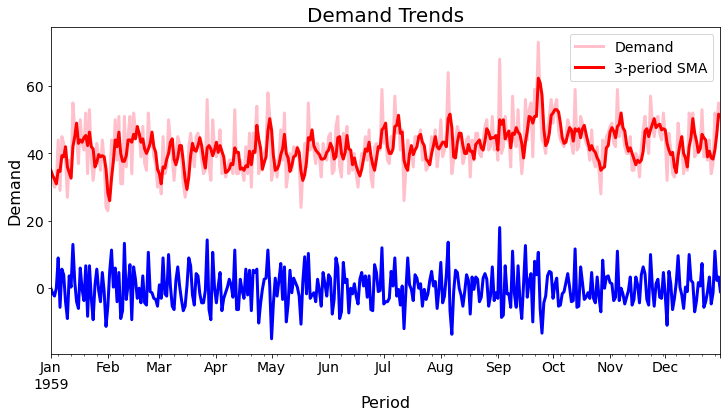

In [ ]:
# colors for the line plot
colors = ['pink', 'red', 'blue', 'green','orange']


# line plot for demand
df.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Demand','3-period SMA'], fontsize=14)

# title and labels
plt.title('Demand Trends', fontsize=20)
plt.xlabel('Period', fontsize=16)
plt.ylabel('Demand', fontsize=16)

In [ ]:
df

,Demand,SMA_3,Error_3
Date,,,
1959-01-01,35,35.00,0.00
1959-01-02,32,33.50,-1.50
1959-01-03,30,32.33,-2.33
1959-01-04,31,31.00,0.00
1959-01-05,44,35.00,9.00
...,...,...,...
1959-12-27,37,38.33,-1.33
1959-12-28,52,41.00,11.00
1959-12-29,48,45.67,2.33


In [ ]:
# For KPI Calculation for period 3
MAE = df["Error_3"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df["Error_3"]**2).mean())
print("RMSE:",round(RMSE,2))
MSE= (df["Error_3"]**2).mean()
print("MSE:",round(MSE,2))
MAPE= np.mean(np.abs((df["Demand"] - df["SMA_3"])/df["Demand"]))*100
print("MAPE:",round(MAPE,2))
PA = 100-MAPE
print("PA:",round(PA,2))

MAE: 4.35
RMSE: 5.42
MSE: 29.38
MAPE: 10.58
PA: 89.42


## Exponential Smoothing

In [ ]:
df = df[['Demand']]

In [ ]:
df

,Demand
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [ ]:
train=df[0:-12] 
test=df[-12:]

In [ ]:
print(train.shape)
print(test.shape)

(353, 1)
(12, 1)


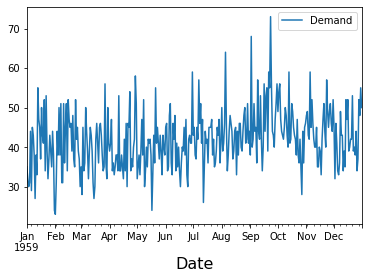

In [ ]:
df.plot()
plt.show()

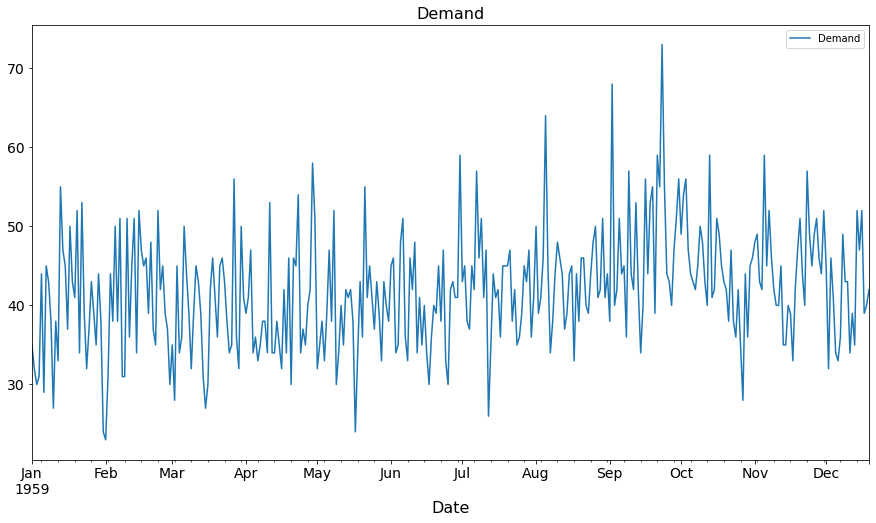

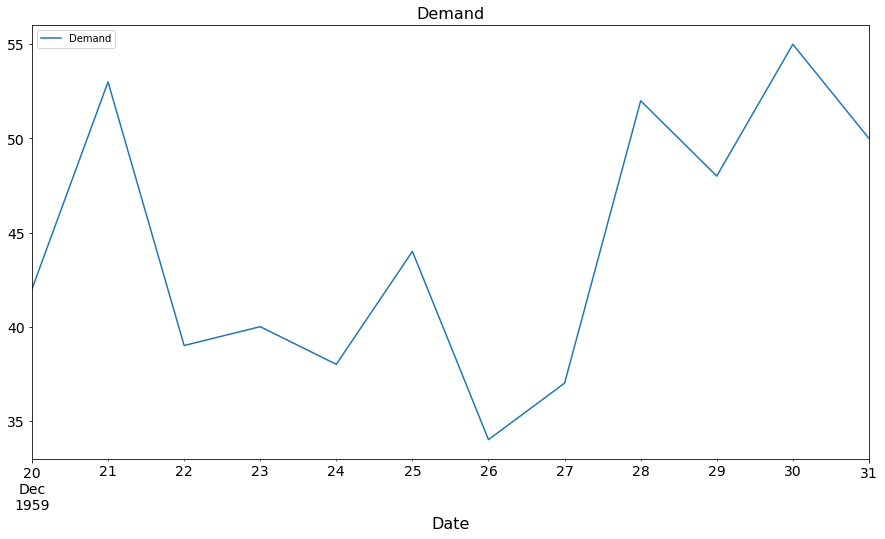

In [ ]:
#Plotting train and test data
train.plot(figsize=(15,8), title= 'Demand', fontsize=14)
test.plot(figsize=(15,8), title= 'Demand', fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#### Triple exponential Smoothing

MAE 6.47
MSE 54.72
RMSE 7.40


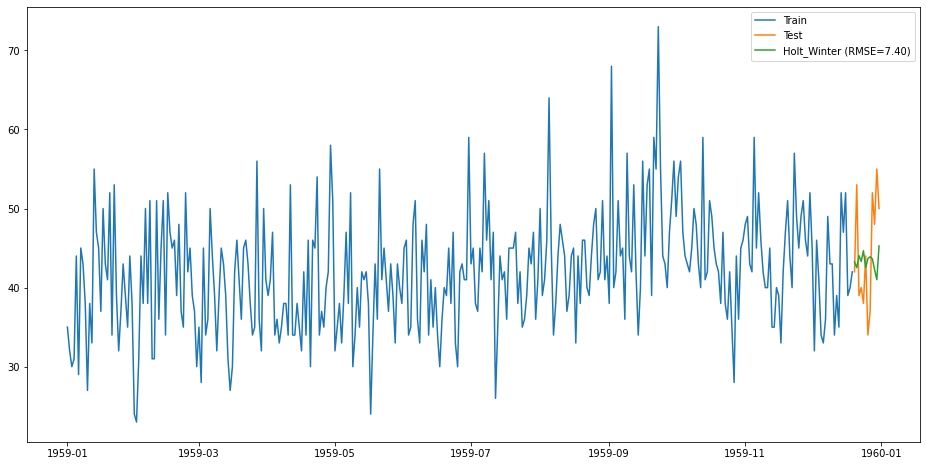

In [ ]:
# Fit the model
pred = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Demand']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()

pred['Holt_Winter'] = fit1.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.Demand, pred.Holt_Winter)
mse=mean_squared_error(test.Demand, pred.Holt_Winter)
rmse = sqrt(mean_squared_error(test.Demand, pred.Holt_Winter))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(16,8))
plt.plot( train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse))

plt.legend()
plt.show()

In [ ]:
pred

,Demand,Holt_Winter
Date,,
1959-12-20,42,43.25
1959-12-21,53,42.52
1959-12-22,39,44.04
1959-12-23,40,43.32
1959-12-24,38,44.67
1959-12-25,44,42.53
1959-12-26,34,43.67
1959-12-27,37,43.90
1959-12-28,52,43.64


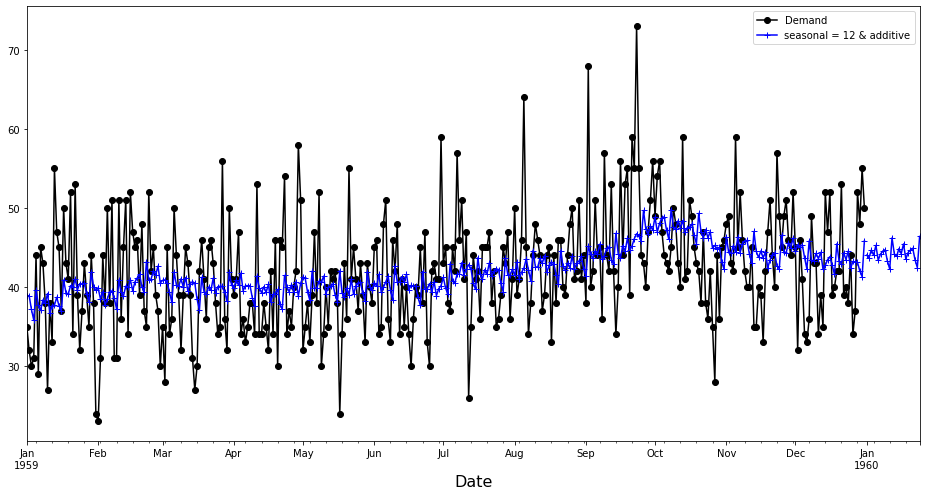

In [ ]:
fit5 = ExponentialSmoothing(df, seasonal_periods=12 ,trend='add', seasonal='add').fit()

fcast3 = fit5.forecast(24).rename('seasonal = 12 & additive')

ax = df.plot(marker='o', color='black', figsize=(16,8), legend=True)


fcast3.plot(marker='+', ax=ax, color='blue', legend=True)
fit5.fittedvalues.plot(marker='+', ax=ax, color='blue')

## Linear Regression

In [ ]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+146 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Demand  time
Date                    
1959-01-01      35     1
1959-01-02      32     2
1959-01-03      30     3
1959-01-04      31     4
1959-01-05      44     5 

Last few rows of Training Data 
             Demand  time
Date                    
1959-12-15      47   349
1959-12-16      52   350
1959-12-17      39   351
1959-12-18      40   352
1959-12-19      42   353 

First few rows of Test Data 
             Demand  time
Date                    
1959-12-20      42   146
1959-12-21      53   147
1959-12-22      39   148
1959-12-23      40   149
1959-12-24      38   150 

Last few rows of Test Data 
             Demand  time
Date                    
1959-12-27      37   153
1959-12-28      52   154
1959-12-29      48   155
1959-12-30      55   156
1959-12-31      50   157 



In [ ]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Demand'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

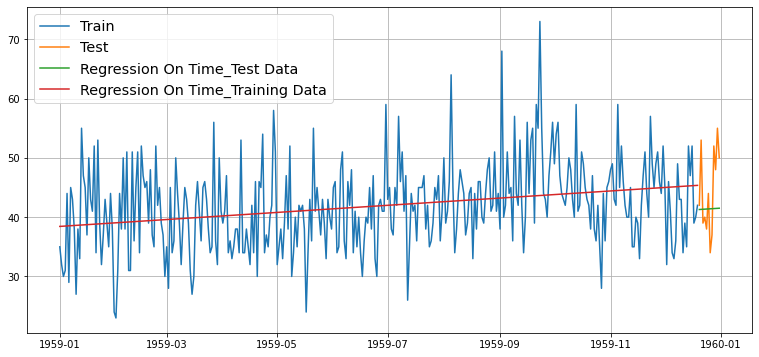

In [ ]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

In [ ]:
from sklearn import metrics

In [ ]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [ ]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Demand'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Demand'],train_predictions_model1)
MAE_model1_train=metrics.mean_absolute_error(train['Demand'], train_predictions_model1)
MSE_model1_train=metrics.mean_squared_error(train['Demand'], train_predictions_model1)

print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))
print("MAE:",MAE_model1_train)
print("MSE:",MSE_model1_train)

For RegressionOnTime forecast on the Training Data,  RMSE is 7.066 MAPE is 13.13
MAE: 5.503016101545914
MSE: 49.92162534562194


In [ ]:
## Test Data - RMSE and MAPE
MAE_model1_test=metrics.mean_absolute_error(test['Demand'], test_predictions_model1)
print("MAE:",MAE_model1_test)

MSE_model1_test=metrics.mean_squared_error(test['Demand'], test_predictions_model1)
print("MSE:",MSE_model1_test) 

rmse_model1_test = metrics.mean_squared_error(test['Demand'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Demand'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

MAE: 6.082067675846186
MSE: 53.81391233305414
For RegressionOnTime forecast on the Test Data,  RMSE is 7.336 MAPE is 13.72


In [ ]:
resultsDf = pd.DataFrame({'Model': 'RegressionOnTime',
                                                    'Test RMSE': [rmse_model1_test],
                          'Test MAPE': [mape_model1_test],
                          'Test MAE':[MAE_model1_test],
                          'Test MSE': [MSE_model1_test]},
                         index=['Model 1'])
resultsDf


,Model,Test RMSE,Test MAPE,Test MAE,Test MSE
Model 1,RegressionOnTime,7.34,13.72,6.08,53.81


## Arima

In [ ]:
df = pd.read_csv("Birth.csv", index_col ='Date', parse_dates =True)

In [ ]:
df

,Demand
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


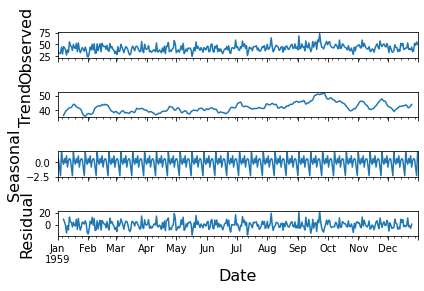

In [ ]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['Demand'], 
                            freq=12)

# Plot decomposition
decomp.plot()
plt.show()

Check stationarity

In [ ]:
# Perform Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller


In [ ]:
df = df[["Demand"]]
result = adfuller(df['Demand'])
print(result)

(-4.808291253559763, 5.243412990149865e-05, 6, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 2343.82909264642)


In [ ]:
# Make the series stationary if it is not
df_diff = df.diff().dropna()
result = adfuller(df_diff['Demand'])
print(result)
# Comment on the results

(-12.625178633871355, 1.5472400091969005e-23, 6, 357, {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}, 2355.0565353964653)


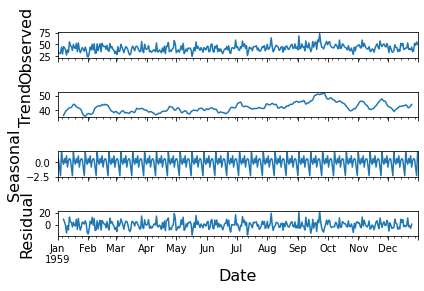

In [ ]:
# Perform additive decomposition
decomp = seasonal_decompose(df['Demand'], freq=12)

# Plot decomposition
decomp.plot()
plt.show()

In [ ]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

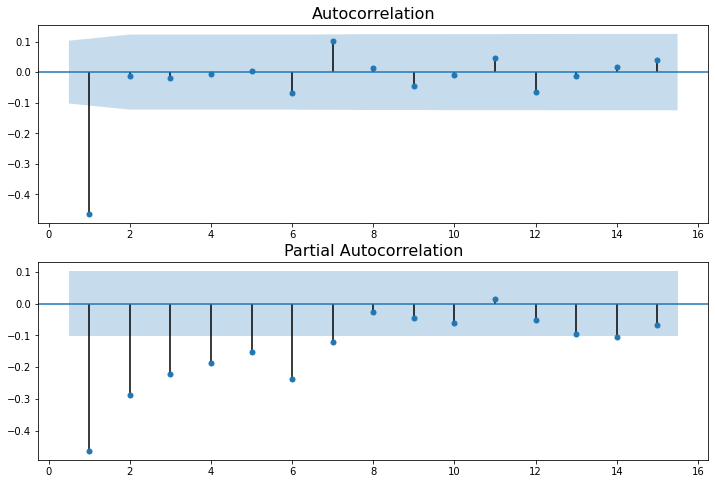

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df_diff, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df_diff, lags=15, zero=False, ax=ax2)

plt.show()

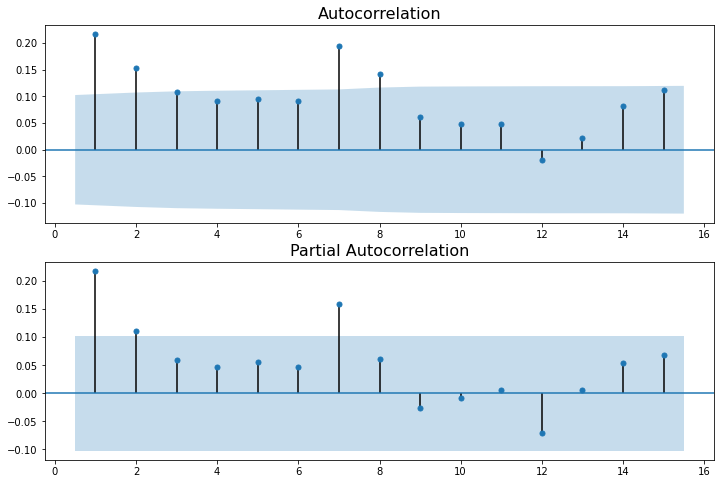

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df, lags=15, zero=False, ax=ax2)

plt.show()

Generate Prediction using your own values p= 2 and q=2

Generating One Step Ahead Predictions in sample

In [ ]:
# Import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(df, order=(2,1,2))

In [ ]:
results = model.fit()

# Print fit summary
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                 Demand   No. Observations:                  365
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1226.183
Date:                Mon, 12 Apr 2021   AIC                           2462.366
Time:                        14:52:56   BIC                           2481.852
Sample:                    01-01-1959   HQIC                          2470.111
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1524      1.251      0.122      0.903      -2.299       2.604
ar.L2          0.0423      0.162      0.262      0.793      -0.274       0.359
ma.L1         -0.9948      1.253     -0.794      0.4

In [ ]:
df

,Demand
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [ ]:
split_point = len(df) - 12
dataset, validation = df[0:split_point], df[split_point:]
print('Train-Dataset: %d, Validation-Dataset: %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Train-Dataset: 353, Validation-Dataset: 12


In [ ]:
X = df.values
X = X.astype('float32')
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[train_size:]

In [ ]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  yhat = history[-1]
  predictions.append(yhat)
  obs = test[i]
  history.append(obs)
  print('>Forecast=%.3f, Actual=%3.f' % (yhat, obs))


>Forecast=43.000, Actual= 45
>Forecast=45.000, Actual= 38
>Forecast=38.000, Actual= 37
>Forecast=37.000, Actual= 45
>Forecast=45.000, Actual= 42
>Forecast=42.000, Actual= 57
>Forecast=57.000, Actual= 46
>Forecast=46.000, Actual= 51
>Forecast=51.000, Actual= 41
>Forecast=41.000, Actual= 47
>Forecast=47.000, Actual= 26
>Forecast=26.000, Actual= 35
>Forecast=35.000, Actual= 44
>Forecast=44.000, Actual= 41
>Forecast=41.000, Actual= 42
>Forecast=42.000, Actual= 36
>Forecast=36.000, Actual= 45
>Forecast=45.000, Actual= 45
>Forecast=45.000, Actual= 45
>Forecast=45.000, Actual= 47
>Forecast=47.000, Actual= 38
>Forecast=38.000, Actual= 42
>Forecast=42.000, Actual= 35
>Forecast=35.000, Actual= 36
>Forecast=36.000, Actual= 39
>Forecast=39.000, Actual= 45
>Forecast=45.000, Actual= 43
>Forecast=43.000, Actual= 47
>Forecast=47.000, Actual= 36
>Forecast=36.000, Actual= 41
>Forecast=41.000, Actual= 50
>Forecast=50.000, Actual= 39
>Forecast=39.000, Actual= 41
>Forecast=41.000, Actual= 46
>Forecast=46.0

In [ ]:
# display performance report
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE: %.3f' % mae)

RMSE: 8.720
MAE: 6.770


In [ ]:
# Generate predictions for the last 12 periods in sample
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

1959-12-20   42.95
1959-12-21   43.01
1959-12-22   44.71
1959-12-23   43.29
1959-12-24   42.67
1959-12-25   42.29
1959-12-26   43.00
1959-12-27   41.73
1959-12-28   41.49
1959-12-29   43.83
1959-12-30   44.17
1959-12-31   45.24
Freq: D, dtype: float64


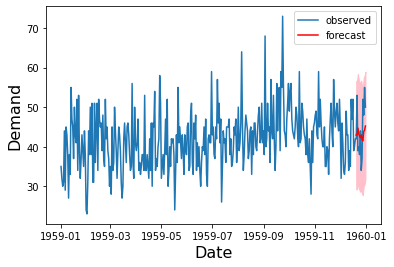

In [ ]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

Generate Dynamic Predictions

In [ ]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

1959-12-20   42.95
1959-12-21   43.15
1959-12-22   43.23
1959-12-23   43.25
1959-12-24   43.25
1959-12-25   43.25
1959-12-26   43.26
1959-12-27   43.26
1959-12-28   43.26
1959-12-29   43.26
1959-12-30   43.26
1959-12-31   43.26
Freq: D, dtype: float64


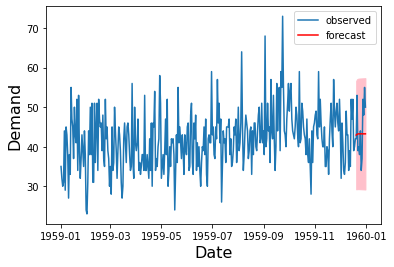

In [ ]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

Out of the Sample Predictions (12 periods ahead)

In [ ]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

1960-01-01   45.10
1960-01-02   44.27
1960-01-03   43.94
1960-01-04   43.85
1960-01-05   43.82
1960-01-06   43.81
1960-01-07   43.81
1960-01-08   43.81
1960-01-09   43.81
1960-01-10   43.81
1960-01-11   43.81
1960-01-12   43.81
Freq: D, dtype: float64


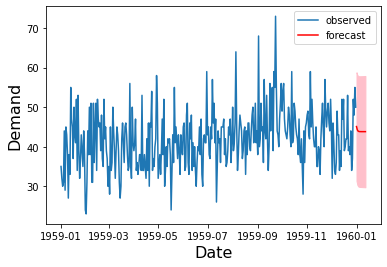

In [ ]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

Use the grid search method to calculate the parameter p and q

In [ ]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(3):
# Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = SARIMAX(df, order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

In [ ]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q      AIC      BIC
4  1  1 2,471.87 2,487.47
5  1  2 2,471.99 2,491.49
7  2  1 2,475.11 2,494.61
8  2  2 2,475.52 2,498.92
6  2  0 2,476.37 2,491.97
3  1  0 2,479.08 2,490.78
2  0  2 2,479.13 2,494.73
1  0  1 2,482.54 2,494.24
0  0  0 2,494.78 2,502.58
   p  q      AIC      BIC
4  1  1 2,471.87 2,487.47
3  1  0 2,479.08 2,490.78
5  1  2 2,471.99 2,491.49
6  2  0 2,476.37 2,491.97
1  0  1 2,482.54 2,494.24
7  2  1 2,475.11 2,494.61
2  0  2 2,479.13 2,494.73
8  2  2 2,475.52 2,498.92
0  0  0 2,494.78 2,502.58


Based on the AIC result p=2 and q=1 and d=1

In [ ]:
# Instantiate the model
arma = SARIMAX(df, order=(2,1,1))

In [ ]:
results = arma.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                 Demand   No. Observations:                  365
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1226.183
Date:                Mon, 12 Apr 2021   AIC                           2460.367
Time:                        14:54:08   BIC                           2475.955
Sample:                    01-01-1959   HQIC                          2466.562
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1237      0.060      2.074      0.038       0.007       0.241
ar.L2          0.0459      0.058      0.795      0.427      -0.067       0.159
ma.L1         -0.9661      0.017    -56.668      0.0

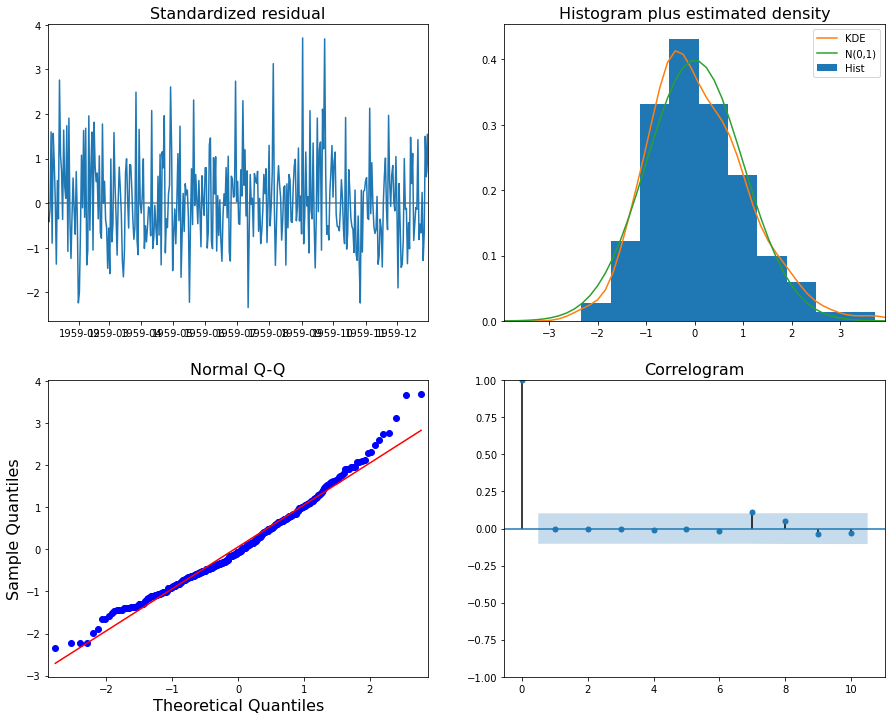

In [ ]:
# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(15,12))
plt.show()

Generate one step forecast

In [ ]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

1959-12-20   42.95
1959-12-21   43.01
1959-12-22   44.71
1959-12-23   43.29
1959-12-24   42.66
1959-12-25   42.30
1959-12-26   43.01
1959-12-27   41.74
1959-12-28   41.49
1959-12-29   43.84
1959-12-30   44.18
1959-12-31   45.23
Freq: D, dtype: float64


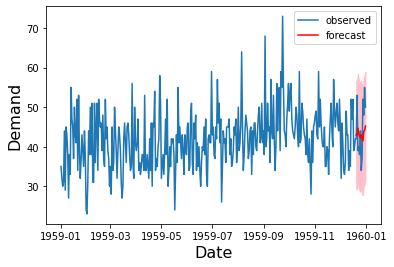

In [ ]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()


Generate Dynamic Predictions

In [ ]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

1959-12-20   42.95
1959-12-21   43.16
1959-12-22   43.23
1959-12-23   43.25
1959-12-24   43.25
1959-12-25   43.25
1959-12-26   43.25
1959-12-27   43.25
1959-12-28   43.25
1959-12-29   43.25
1959-12-30   43.25
1959-12-31   43.25
Freq: D, dtype: float64


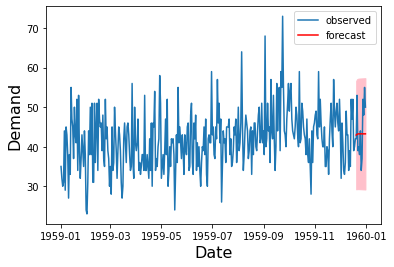

In [ ]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

Out of the Sample Predictions

In [ ]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

1960-01-01   45.09
1960-01-02   44.25
1960-01-03   43.92
1960-01-04   43.84
1960-01-05   43.82
1960-01-06   43.81
1960-01-07   43.81
1960-01-08   43.81
1960-01-09   43.81
1960-01-10   43.81
1960-01-11   43.81
1960-01-12   43.81
Freq: D, dtype: float64


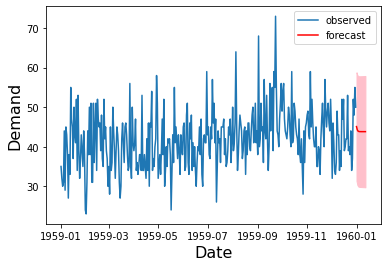

In [ ]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

Based on the BIC result p=1 and q=0 and d=1

In [ ]:
# Instantiate the model
arma = SARIMAX(df, order=(1,1,0))

In [ ]:
results = arma.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                 Demand   No. Observations:                  365
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1279.630
Date:                Mon, 12 Apr 2021   AIC                           2563.261
Time:                        14:55:10   BIC                           2571.055
Sample:                    01-01-1959   HQIC                          2566.359
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4618      0.046     -9.998      0.000      -0.552      -0.371
sigma2        66.1811      4.855     13.631      0.000      56.665      75.697
Ljung-Box (Q):                       92.62   Jarque-

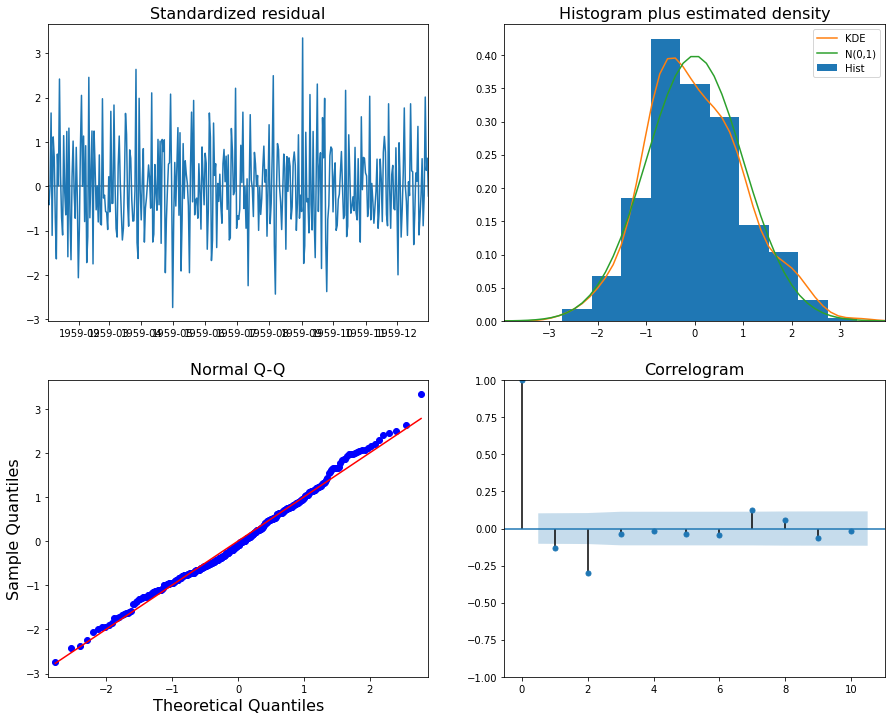

In [ ]:
# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(15,12))
plt.show()

Generate one step forecast

In [ ]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

1959-12-20   41.08
1959-12-21   42.00
1959-12-22   47.92
1959-12-23   45.47
1959-12-24   39.54
1959-12-25   38.92
1959-12-26   41.23
1959-12-27   38.62
1959-12-28   35.61
1959-12-29   45.07
1959-12-30   49.85
1959-12-31   51.77
Freq: D, dtype: float64


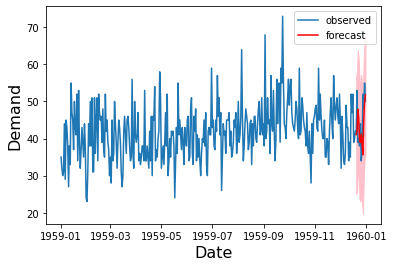

In [ ]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()


Generate Dynamic Predictions

In [ ]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

1959-12-20   41.08
1959-12-21   41.50
1959-12-22   41.31
1959-12-23   41.40
1959-12-24   41.35
1959-12-25   41.37
1959-12-26   41.37
1959-12-27   41.37
1959-12-28   41.37
1959-12-29   41.37
1959-12-30   41.37
1959-12-31   41.37
Freq: D, dtype: float64


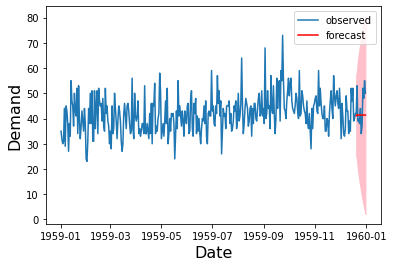

In [ ]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

Out of the Sample Predictions

In [ ]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

1960-01-01   52.31
1960-01-02   51.24
1960-01-03   51.74
1960-01-04   51.51
1960-01-05   51.61
1960-01-06   51.56
1960-01-07   51.59
1960-01-08   51.58
1960-01-09   51.58
1960-01-10   51.58
1960-01-11   51.58
1960-01-12   51.58
Freq: D, dtype: float64


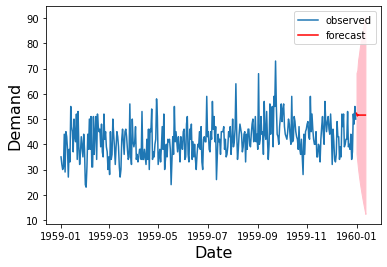

In [ ]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

## Machine Learning

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import the dataset
birth = pd.read_csv("Birth.csv", index_col=0, parse_dates=True)
birth.head()

,Demand
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


#### Prepare the dataset for machine learning

In [ ]:
# reframe as supervised learning
# lab observation (t-1) is the input variable and t is the output variable.
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months in this case
for i in range(12,0,-1):
    df[['t-'+str(i)]] = birth.shift(i)
print(df)

            t-12  t-11  t-10   t-9   t-8  ...   t-5   t-4   t-3   t-2   t-1
Date                                      ...                              
1959-01-01   nan   nan   nan   nan   nan  ...   nan   nan   nan   nan   nan
1959-01-02   nan   nan   nan   nan   nan  ...   nan   nan   nan   nan 35.00
1959-01-03   nan   nan   nan   nan   nan  ...   nan   nan   nan 35.00 32.00
1959-01-04   nan   nan   nan   nan   nan  ...   nan   nan 35.00 32.00 30.00
1959-01-05   nan   nan   nan   nan   nan  ...   nan 35.00 32.00 30.00 31.00
...          ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
1959-12-27 47.00 52.00 39.00 40.00 42.00  ... 39.00 40.00 38.00 44.00 34.00
1959-12-28 52.00 39.00 40.00 42.00 42.00  ... 40.00 38.00 44.00 34.00 37.00
1959-12-29 39.00 40.00 42.00 42.00 53.00  ... 38.00 44.00 34.00 37.00 52.00
1959-12-30 40.00 42.00 42.00 53.00 39.00  ... 44.00 34.00 37.00 52.00 48.00
1959-12-31 42.00 42.00 53.00 39.00 40.00  ... 34.00 37.00 52.00 48.00 55.00

[365 rows x

In [ ]:
# Create column t (original column)
df['t'] = birth.values
print(df.head(12))

            t-12  t-11  t-10   t-9   t-8  ...   t-4   t-3   t-2   t-1   t
Date                                      ...                            
1959-01-01   nan   nan   nan   nan   nan  ...   nan   nan   nan   nan  35
1959-01-02   nan   nan   nan   nan   nan  ...   nan   nan   nan 35.00  32
1959-01-03   nan   nan   nan   nan   nan  ...   nan   nan 35.00 32.00  30
1959-01-04   nan   nan   nan   nan   nan  ...   nan 35.00 32.00 30.00  31
1959-01-05   nan   nan   nan   nan   nan  ... 35.00 32.00 30.00 31.00  44
1959-01-06   nan   nan   nan   nan   nan  ... 32.00 30.00 31.00 44.00  29
1959-01-07   nan   nan   nan   nan   nan  ... 30.00 31.00 44.00 29.00  45
1959-01-08   nan   nan   nan   nan   nan  ... 31.00 44.00 29.00 45.00  43
1959-01-09   nan   nan   nan   nan 35.00  ... 44.00 29.00 45.00 43.00  38
1959-01-10   nan   nan   nan 35.00 32.00  ... 29.00 45.00 43.00 38.00  27
1959-01-11   nan   nan 35.00 32.00 30.00  ... 45.00 43.00 38.00 27.00  38
1959-01-12   nan 35.00 32.00 30.00 31.

In [ ]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
df_birth = df[12:]
print(df_birth)

            t-12  t-11  t-10   t-9   t-8  ...   t-4   t-3   t-2   t-1   t
Date                                      ...                            
1959-01-13 35.00 32.00 30.00 31.00 44.00  ... 38.00 27.00 38.00 33.00  55
1959-01-14 32.00 30.00 31.00 44.00 29.00  ... 27.00 38.00 33.00 55.00  47
1959-01-15 30.00 31.00 44.00 29.00 45.00  ... 38.00 33.00 55.00 47.00  45
1959-01-16 31.00 44.00 29.00 45.00 43.00  ... 33.00 55.00 47.00 45.00  37
1959-01-17 44.00 29.00 45.00 43.00 38.00  ... 55.00 47.00 45.00 37.00  50
...          ...   ...   ...   ...   ...  ...   ...   ...   ...   ...  ..
1959-12-27 47.00 52.00 39.00 40.00 42.00  ... 40.00 38.00 44.00 34.00  37
1959-12-28 52.00 39.00 40.00 42.00 42.00  ... 38.00 44.00 34.00 37.00  52
1959-12-29 39.00 40.00 42.00 42.00 53.00  ... 44.00 34.00 37.00 52.00  48
1959-12-30 40.00 42.00 42.00 53.00 39.00  ... 34.00 37.00 52.00 48.00  55
1959-12-31 42.00 42.00 53.00 39.00 40.00  ... 37.00 52.00 48.00 55.00  50

[353 rows x 13 columns]


In [ ]:
df_birth.shape


(353, 13)

In [ ]:
# Split Data into dependent(target) and independent(features) variables

birth = df_birth.values
# Lagged variables (features) and original time series data (target)
X2= birth[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y2 = birth[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [ ]:
# Columns t-1 to t-12, which are the lagged variables
X2.shape

(353, 12)

In [ ]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
y2.shape

(353,)

####  Here we are using a 75-25 split.

In [ ]:
# Target(Y) Train-Test split

Y2 = y2
traintarget_size = int(len(Y2) * 0.75)   # Set split
print(traintarget_size)
train_target, test_target = Y2[:traintarget_size], Y2[traintarget_size:len(Y2)]

print('Observations for Target: %d' % (len(Y2)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

264
Observations for Target: 353
Training Observations for Target: 264
Testing Observations for Target: 89


In [ ]:
# Features(X) Train-Test split

trainfeature_size = int(len(X2) * 0.75)
train_feature, test_feature = X2[:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observations for feature: %d' % (len(X2)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 353
Training Observations for feature: 264
Testing Observations for feature: 89


In [ ]:
train_feature

array([[35., 32., 30., ..., 27., 38., 33.],
       [32., 30., 31., ..., 38., 33., 55.],
       [30., 31., 44., ..., 33., 55., 47.],
       ...,
       [55., 39., 59., ..., 47., 51., 56.],
       [39., 59., 55., ..., 51., 56., 49.],
       [59., 55., 73., ..., 56., 49., 54.]])

### Benchmark Model

In [ ]:
from sklearn.linear_model import LinearRegression
  
reg = LinearRegression() # Create a linear regression object
  
reg = reg.fit(train_feature, train_target) # Fit it to the training data
  
# Create two predictions for the training and test sets
train_prediction = reg.predict(train_feature)
test_prediction = reg.predict(test_feature)

In [ ]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))



Tree on train set MAE%: 8.7
Tree on test set MAE%: 12.5


### Decision Tree Model

In [ ]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_birth = DecisionTreeRegressor()  # max_depth not set

# Fit the model to the training features and targets
decision_tree_birth.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_birth.score(train_feature, train_target))
print(decision_tree_birth.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


1.0
-1.2471067183915885


In [ ]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Trying different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3,4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_birth = DecisionTreeRegressor(max_depth=d)
    decision_tree_birth.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_birth.score(train_feature, train_target))
    print(decision_tree_birth.score(test_feature, test_target), '\n')  # You want the test score to be positive
    
# R-square for train and test scores are below. 

max_depth= 2
0.16606587965008535
-0.12615188661384802 

max_depth= 3
0.23449397860775367
-0.11125636112450676 

max_depth= 4
0.30579399911337146
-0.2861903334382072 

max_depth= 5
0.39029076656185724
-0.36824255343243356 

max_depth= 7
0.5691449514529384
-0.5008264534687474 

max_depth= 8
0.6562800671634568
-0.44625149546878684 

max_depth= 10
0.8046905754099215
-0.6414807104812874 



#### The best max_depth is max_depth that gives the best test score (positive and high).

Tree on train set MAE%: 11.2
Tree on test set MAE%: 13.1


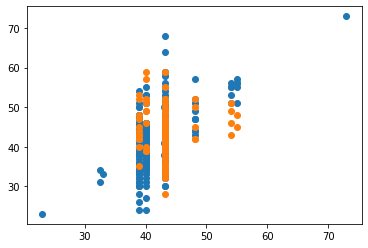

In [ ]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_birth = DecisionTreeRegressor(max_depth=4) # Fill in best max depth score here
decision_tree_birth.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_birth.predict(train_feature)

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))


test_prediction = decision_tree_birth.predict(test_feature)

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

# Scatter the predictions vs actual values, orange is predicted
plt.scatter(train_prediction, train_target, label='train')  # blue 
plt.scatter(test_prediction, test_target, label='test')  
plt.show()


### Random Forest Model

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200 )
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.8651075356597036
-0.21427247824759063


In [ ]:
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, but also takes longer it will take to compute. 
# Run grid search
#grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [13]}
grid = {'n_estimators': [200], 'max_depth': [8], 'max_features': [3], 'random_state': [13]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  

# The best test score

-0.12260504971732011 {'random_state': 13, 'n_estimators': 200, 'max_features': 3, 'max_depth': 8}


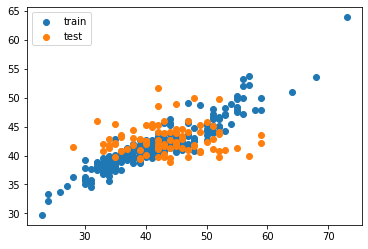

In [ ]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=8, max_features = 3, random_state=13)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

In [ ]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))


Tree on train set MAE%: 8.1
Tree on test set MAE%: 12.1


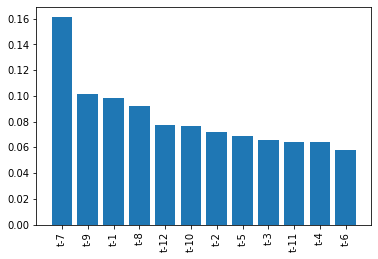

In [ ]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

 Here, we can see how much each lag variable gives in explanatory power. It shows the explanatory power for each lag in sorted order.

### Gradient Boosted Tree Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=7,
                                learning_rate=0.01,
                                n_estimators=500,
                                subsample=0.6,
                                random_state=99)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.620333024521116
-0.21342240953654443


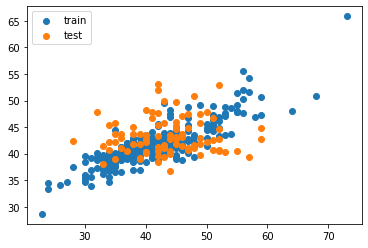

In [ ]:
# Make predictions with our model
train_prediction = gbr.predict(train_feature)
test_prediction = gbr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

In [ ]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))



Tree on train set MAE%: 8.7
Tree on test set MAE%: 12.5


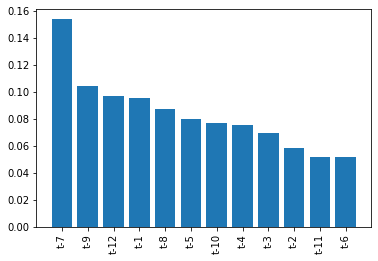

In [ ]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x2 = range(X2.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plt.bar(x2, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

## LSTM

In [ ]:
dataframe = pd.read_csv('Birth.csv')
df = dataframe.iloc[:,1].values
df

array([35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50,
       43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44,
       38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48,
       37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32,
       39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 46, 43, 38, 34, 35,
       56, 36, 32, 50, 41, 39, 41, 47, 34, 36, 33, 35, 38, 38, 34, 53, 34,
       34, 38, 35, 32, 42, 34, 46, 30, 46, 45, 54, 34, 37, 35, 40, 42, 58,
       51, 32, 35, 38, 33, 39, 47, 38, 52, 30, 34, 40, 35, 42, 41, 42, 38,
       24, 34, 43, 36, 55, 41, 45, 41, 37, 43, 39, 33, 43, 40, 38, 45, 46,
       34, 35, 48, 51, 36, 33, 46, 42, 48, 34, 41, 35, 40, 34, 30, 36, 40,
       39, 45, 38, 47, 33, 30, 42, 43, 41, 41, 59, 43, 45, 38, 37, 45, 42,
       57, 46, 51, 41, 47, 26, 35, 44, 41, 42, 36, 45, 45, 45, 47, 38, 42,
       35, 36, 39, 45, 43, 47, 36, 41, 50, 39, 41, 46, 64, 45, 34, 38, 44,
       48, 46, 44, 37, 39

In [ ]:
df = df.reshape(-1,1)
df

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [ ]:
df.dtype

dtype('int64')

In [ ]:
# Coverting to float as Neural networks work best with floats if it is already not there
df = df.astype('float32')
df.shape

(365, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scaling the data
scalar =MinMaxScaler()
df=scalar.fit_transform(df)

In [ ]:
# Split into train and test
train = df[:-40,:]
test = df[-40:,:]

In [ ]:
print(len(train), len(test))

325 40


In [ ]:
# Building the 2D array for supervised learning
def create_data(sequence, time_stemp):
    dataX = []
    dataY = []
    for i in range(len(sequence)-time_stemp-1):
        a = sequence[i:(i+time_stemp), 0]
        dataX.append(a)
        dataY.append(sequence[i + time_stemp, 0])
    return np.array(dataX),  np.array(dataY)

In [ ]:
time_stemp = 1

In [ ]:
# Apply the 2D array function to train and test datasets
train_X, train_Y = create_data(train,time_stemp)
test_X, test_Y =create_data(test, time_stemp)

In [ ]:
# transform input from [samples, features] to [samples, timesteps, features] basically from 2D to 3D
train_X = np.reshape(train_X, (train_X.shape[0],1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings("ignore")

Model 1

In [ ]:

# Build the LSTM Model
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(50, activation= 'relu', input_shape =(1, time_stemp)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
model.fit(train_X, train_Y, batch_size=4, epochs =50, verbose=2)

Epoch 1/50
81/81 - 2s - loss: 0.1087
Epoch 2/50
81/81 - 0s - loss: 0.0349
Epoch 3/50
81/81 - 0s - loss: 0.0223
Epoch 4/50
81/81 - 0s - loss: 0.0213
Epoch 5/50
81/81 - 0s - loss: 0.0220
Epoch 6/50
81/81 - 0s - loss: 0.0218
Epoch 7/50
81/81 - 0s - loss: 0.0218
Epoch 8/50
81/81 - 0s - loss: 0.0225
Epoch 9/50
81/81 - 0s - loss: 0.0219
Epoch 10/50
81/81 - 0s - loss: 0.0222
Epoch 11/50
81/81 - 0s - loss: 0.0214
Epoch 12/50
81/81 - 0s - loss: 0.0226
Epoch 13/50
81/81 - 0s - loss: 0.0224
Epoch 14/50
81/81 - 0s - loss: 0.0223
Epoch 15/50
81/81 - 0s - loss: 0.0225
Epoch 16/50
81/81 - 0s - loss: 0.0220
Epoch 17/50
81/81 - 0s - loss: 0.0213
Epoch 18/50
81/81 - 0s - loss: 0.0219
Epoch 19/50
81/81 - 0s - loss: 0.0216
Epoch 20/50
81/81 - 0s - loss: 0.0217
Epoch 21/50
81/81 - 0s - loss: 0.0227
Epoch 22/50
81/81 - 0s - loss: 0.0220
Epoch 23/50
81/81 - 0s - loss: 0.0221
Epoch 24/50
81/81 - 0s - loss: 0.0215
Epoch 25/50
81/81 - 0s - loss: 0.0213
Epoch 26/50
81/81 - 0s - loss: 0.0217
Epoch 27/50
81/81 - 0

In [ ]:
import math

In [ ]:
# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
train_y = scalar.inverse_transform([train_Y])
test_predict = scalar.inverse_transform(test_predict)
test_y = scalar.inverse_transform([test_Y])
# calculate root mean squared error
train_m1 = math.sqrt(mean_squared_error(train_y[0], train_predict[:,0]))
print('Train Score: %.3f RMSE' % (train_m1))
test_m1 = math.sqrt(mean_squared_error(test_y[0], test_predict[:,0]))
print('Test Score: %.3f RMSE' % (test_m1))


Train Score: 7.248 RMSE
Test Score: 6.754 RMSE


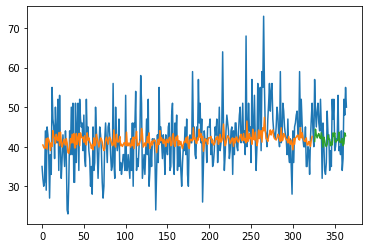

In [ ]:
# shifting train
train_plot = np.empty_like(df) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_stemp:len(train_predict)+time_stemp, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(df)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_stemp*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()

Model 2

In [ ]:
# Build the LSTM Model
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(50, activation= 'relu', input_shape =(1, time_stemp)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
model.fit(train_X, train_Y, batch_size=4, epochs =100, verbose=2)

Epoch 1/100
81/81 - 1s - loss: 0.1039
Epoch 2/100
81/81 - 0s - loss: 0.0366
Epoch 3/100
81/81 - 0s - loss: 0.0225
Epoch 4/100
81/81 - 0s - loss: 0.0226
Epoch 5/100
81/81 - 0s - loss: 0.0224
Epoch 6/100
81/81 - 0s - loss: 0.0221
Epoch 7/100
81/81 - 0s - loss: 0.0221
Epoch 8/100
81/81 - 0s - loss: 0.0227
Epoch 9/100
81/81 - 0s - loss: 0.0223
Epoch 10/100
81/81 - 0s - loss: 0.0215
Epoch 11/100
81/81 - 0s - loss: 0.0222
Epoch 12/100
81/81 - 0s - loss: 0.0223
Epoch 13/100
81/81 - 0s - loss: 0.0218
Epoch 14/100
81/81 - 0s - loss: 0.0223
Epoch 15/100
81/81 - 0s - loss: 0.0226
Epoch 16/100
81/81 - 0s - loss: 0.0224
Epoch 17/100
81/81 - 0s - loss: 0.0218
Epoch 18/100
81/81 - 0s - loss: 0.0218
Epoch 19/100
81/81 - 0s - loss: 0.0226
Epoch 20/100
81/81 - 0s - loss: 0.0217
Epoch 21/100
81/81 - 0s - loss: 0.0215
Epoch 22/100
81/81 - 0s - loss: 0.0220
Epoch 23/100
81/81 - 0s - loss: 0.0217
Epoch 24/100
81/81 - 0s - loss: 0.0228
Epoch 25/100
81/81 - 0s - loss: 0.0214
Epoch 26/100
81/81 - 0s - loss: 0.

In [ ]:
# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
train_y = scalar.inverse_transform([train_Y])
test_predict = scalar.inverse_transform(test_predict)
test_y = scalar.inverse_transform([test_Y])
# calculate root mean squared error
train_m2 = math.sqrt(mean_squared_error(train_y[0], train_predict[:,0]))
print('Train Score2: %.3f RMSE' % (train_m2))
test_m2 = math.sqrt(mean_squared_error(test_y[0], test_predict[:,0]))
print('Test Score2: %.3f RMSE' % (test_m2))


Train Score2: 7.281 RMSE
Test Score2: 6.917 RMSE


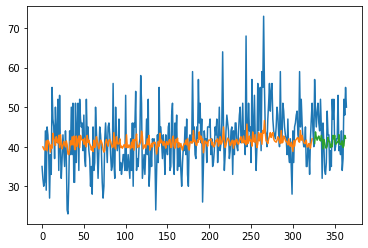

In [ ]:
# shifting train
train_plot = np.empty_like(df) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_stemp:len(train_predict)+time_stemp, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(df)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_stemp*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()

model 3

In [ ]:
# Build the LSTM Model
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(50, activation= 'relu', input_shape =(1, time_stemp)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
model.fit(train_X, train_Y, batch_size=4, epochs =80, verbose=2)

Epoch 1/80
81/81 - 2s - loss: 0.0961
Epoch 2/80
81/81 - 0s - loss: 0.0271
Epoch 3/80
81/81 - 0s - loss: 0.0223
Epoch 4/80
81/81 - 0s - loss: 0.0227
Epoch 5/80
81/81 - 0s - loss: 0.0217
Epoch 6/80
81/81 - 0s - loss: 0.0214
Epoch 7/80
81/81 - 0s - loss: 0.0215
Epoch 8/80
81/81 - 0s - loss: 0.0223
Epoch 9/80
81/81 - 0s - loss: 0.0222
Epoch 10/80
81/81 - 0s - loss: 0.0210
Epoch 11/80
81/81 - 0s - loss: 0.0225
Epoch 12/80
81/81 - 0s - loss: 0.0216
Epoch 13/80
81/81 - 0s - loss: 0.0231
Epoch 14/80
81/81 - 0s - loss: 0.0212
Epoch 15/80
81/81 - 0s - loss: 0.0220
Epoch 16/80
81/81 - 0s - loss: 0.0219
Epoch 17/80
81/81 - 0s - loss: 0.0222
Epoch 18/80
81/81 - 0s - loss: 0.0218
Epoch 19/80
81/81 - 0s - loss: 0.0219
Epoch 20/80
81/81 - 0s - loss: 0.0221
Epoch 21/80
81/81 - 0s - loss: 0.0220
Epoch 22/80
81/81 - 0s - loss: 0.0217
Epoch 23/80
81/81 - 0s - loss: 0.0214
Epoch 24/80
81/81 - 0s - loss: 0.0223
Epoch 25/80
81/81 - 0s - loss: 0.0221
Epoch 26/80
81/81 - 0s - loss: 0.0221
Epoch 27/80
81/81 - 0

In [ ]:
# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
train_y = scalar.inverse_transform([train_Y])
test_predict = scalar.inverse_transform(test_predict)
test_y = scalar.inverse_transform([test_Y])
# calculate root mean squared error
train_m3 = math.sqrt(mean_squared_error(train_y[0], train_predict[:,0]))
print('Train Score3: %.3f RMSE' % (train_m3))
test_m3 = math.sqrt(mean_squared_error(test_y[0], test_predict[:,0]))
print('Test Score3: %.3f RMSE' % (test_m3))


Train Score3: 7.245 RMSE
Test Score3: 6.700 RMSE


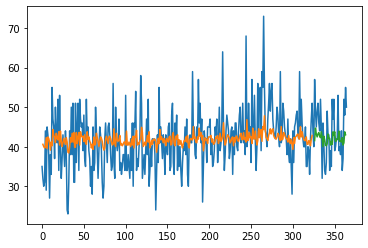

In [ ]:
# shifting train
train_plot = np.empty_like(df) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_stemp:len(train_predict)+time_stemp, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(df)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_stemp*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()

In [ ]:
performance = {'Model Name':['LSTM-model-1','LSTM-model-2','LSTM-model-3'],
        'RMSE':[test_m1,test_m2,test_m3]}

Metrics = pd.DataFrame(performance, columns = ['Model Name','RMSE'])
Metrics.sort_values(by=['RMSE'])

,Model Name,RMSE
2,LSTM-model-3,6.70
0,LSTM-model-1,6.75
1,LSTM-model-2,6.92


## Extra